# Generate histogram plots using the number of neighbors using the whole cell segmentation 

## Import libraries

In [1]:
import pathlib
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Set variables and paths

In [2]:
# Path to directory with single-cell profiles
sc_dir = pathlib.Path("../../../3.process_cfret_features/data/single_cell_profiles").resolve(
    strict=True
)

# Output directory for figures
output_dir_fig = pathlib.Path("./figures")
output_dir_fig.mkdir(parents=True, exist_ok=True)

# Path to annotated profile for Plate 4 only
annotated_profile = pathlib.Path(f"{sc_dir}/localhost231120090001_sc_annotated.parquet").resolve(strict=True)

# Read in data frame
annotated_df = pd.read_parquet(annotated_profile)

print(annotated_df.shape)
annotated_df.head()

(21370, 2022)


,Metadata_WellRow,Metadata_WellCol,Metadata_heart_number,Metadata_cell_type,Metadata_heart_failure_type,Metadata_treatment,Metadata_Cells_Location_Center_X,Metadata_Cells_Location_Center_Y,Metadata_Image_Count_Cells,Metadata_ImageNumber,...,Nuclei_Texture_Variance_Hoechst_3_02_256,Nuclei_Texture_Variance_Hoechst_3_03_256,Nuclei_Texture_Variance_Mitochondria_3_00_256,Nuclei_Texture_Variance_Mitochondria_3_01_256,Nuclei_Texture_Variance_Mitochondria_3_02_256,Nuclei_Texture_Variance_Mitochondria_3_03_256,Nuclei_Texture_Variance_PM_3_00_256,Nuclei_Texture_Variance_PM_3_01_256,Nuclei_Texture_Variance_PM_3_02_256,Nuclei_Texture_Variance_PM_3_03_256
0,B,2,2,Healthy,None,None,520.849209,277.583420,20,1.0,...,2.261202,2.234199,0.283552,0.286277,0.281137,0.280018,0.824348,0.831982,0.822502,0.794160
1,B,2,2,Healthy,None,None,313.661110,374.449986,20,1.0,...,3.083781,3.047163,0.238799,0.235608,0.262517,0.247103,0.886573,0.890560,0.909833,0.885598
2,B,2,2,Healthy,None,None,709.496383,379.652932,20,1.0,...,0.899203,0.919880,0.155762,0.155740,0.164075,0.156480,0.810832,0.835048,0.813655,0.812339
3,B,2,2,Healthy,None,None,869.851378,511.154606,20,1.0,...,2.913076,2.911455,0.377669,0.374731,0.363038,0.346197,2.859340,2.973961,2.922192,2.739148
4,B,2,2,Healthy,None,None,588.967372,503.936707,20,1.0,...,3.693088,3.715200,0.189286,0.200514,0.192271,0.189659,1.359794,1.338005,1.371597,1.304711


## Generate density plot with all hearts

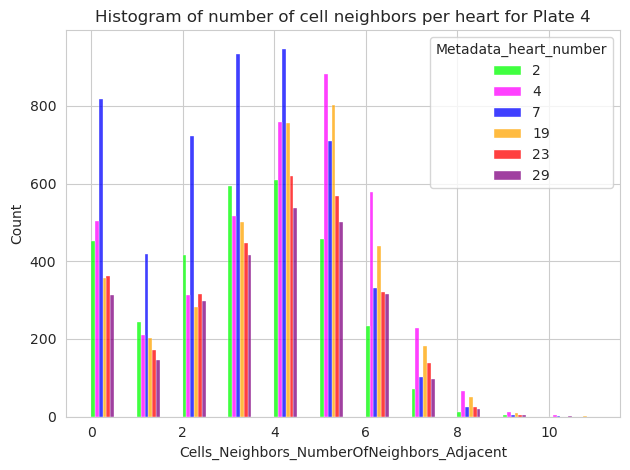

In [3]:
sns.set_style("whitegrid")
sns.histplot(
    data=annotated_df,
    x="Cells_Neighbors_NumberOfNeighbors_Adjacent",
    hue='Metadata_heart_number',
    palette=["#00FF00", "#FF00FF", "#0000FF", "#FFA500", "#FF0000", "#800080"],
    multiple="dodge",
    binwidth=0.5
)
plt.title(f"Histogram of number of cell neighbors per heart for Plate 4")
plt.xlabel("Cells_Neighbors_NumberOfNeighbors_Adjacent")
plt.ylabel("Count")

plt.tight_layout()
plt.savefig(
    pathlib.Path(f"{output_dir_fig}/plate_4_heart_number_neighbors.png"), dpi=500
)
plt.show()


## Generate density plot with only healthy hearts

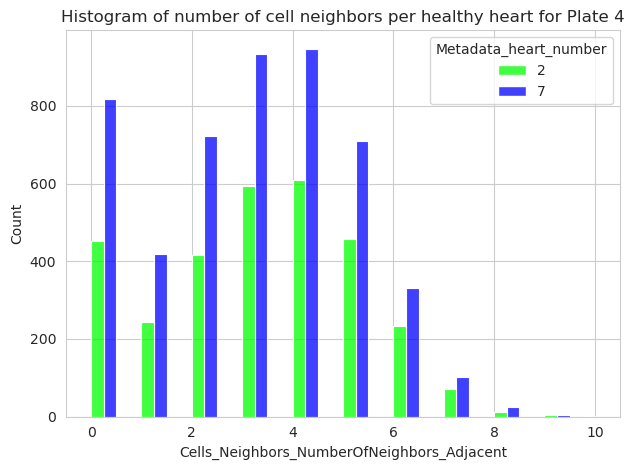

In [4]:
# Filter out only healthy hearts to generate plot
filtered_df = annotated_df[annotated_df['Metadata_cell_type'] == 'Healthy']

sns.set_style("whitegrid")
sns.histplot(
    data=filtered_df,
    x="Cells_Neighbors_NumberOfNeighbors_Adjacent",
    hue='Metadata_heart_number',
    palette=["#00FF00", "#0000FF"],
    multiple="dodge",
    binwidth=0.5
)
plt.title(f"Histogram of number of cell neighbors per healthy heart for Plate 4")
plt.xlabel("Cells_Neighbors_NumberOfNeighbors_Adjacent")
plt.ylabel("Count")

plt.tight_layout()
plt.savefig(
    pathlib.Path(f"{output_dir_fig}/plate_4_heart_healthy_neighbors.png"), dpi=500
)
plt.show()

## Generate density plot with only failing hearts

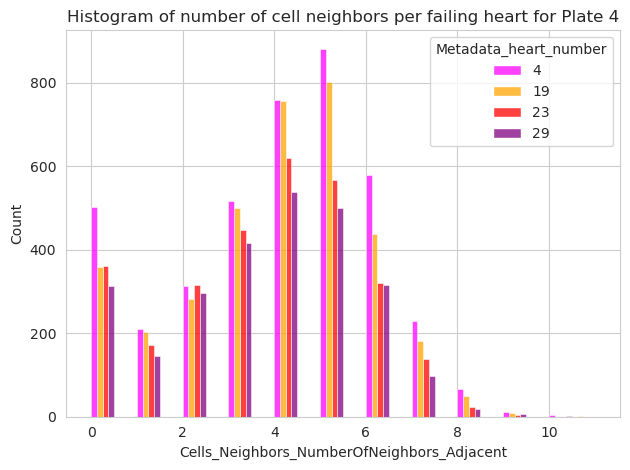

In [5]:
# Filter out only failing hearts to generate plot
filtered_df = annotated_df[annotated_df['Metadata_cell_type'] == 'Failing']

sns.set_style("whitegrid")
sns.histplot(
    data=filtered_df,
    x="Cells_Neighbors_NumberOfNeighbors_Adjacent",
    hue='Metadata_heart_number',
    palette=["#FF00FF", "#FFA500", "#FF0000", "#800080"],
    multiple="dodge",
    binwidth=0.5
)
plt.title(f"Histogram of number of cell neighbors per failing heart for Plate 4")
plt.xlabel("Cells_Neighbors_NumberOfNeighbors_Adjacent")
plt.ylabel("Count")

plt.tight_layout()
plt.savefig(
    pathlib.Path(f"{output_dir_fig}/plate_4_heart_failing_neighbors.png"), dpi=500
)
plt.show()